# Lecture 08: Scikit-Learn API


Applied Machine Learning 


Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Feb xx, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set 2 is due today, extension is fine.
2. Problem Set 3 released today, reinforces today's lecture 
3. Recitations will review Regularization (particularly Ridge Regression, Lasso and Elastic Net).
4. You should continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.



# Scikit-Learn



<table>
    <td width="40%"><center>
        <img src="./img/Lecture-08/Scikit-learn-creative.png" />      
    </center>
    Generated by Chat-GPT 
     </td>  
    <td>
<font size = "+1.0">
<b>scikit-learn</b> is one of the most widely-used, open-source machine learning libraries in Python.   
    
A simple and straighforward API allows exploring many different machine learning data and modeling algorithms. 

This notebook covers some of the basics of **scikit-learn** focusing on the functionality and the API, rather than on the algorithm implementation details.

You should always refer to the API documentation 
<a href="https://scikit-learn.org/stable/modules/classes.html">Scikit-learn API</a> for details; however, in this lecture we will cover some of the basics,including Datasets, Transformations, Estimators, Metrics, Model Selection and Inference.
</font>
</td></table> 


## Datasets

<a href="https://scikit-learn.org/stable/datasets.html">Scikit-learn Dataset</a> offers access to the following types of datasets:

1. Toy and small datasets for illustrating algorithms  (like iris, diabetes and handwritten digits).
2. Real-world and large datasets (like california housing) that can be used to study scaling and computational performance.
3.  Generated or synthetic datasets (like makemoons) which can be used to test and evaluate specific model assumptions, and evaluate how different model algorithms perform for these datasets.

These datasets can be accessed and the dataset description and column metadata can eb obtained.

In [1]:
import pprint
pp = pprint.PrettyPrinter(depth=4)

from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
print(california_housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
from sklearn.datasets import load_iris
iris_df = load_iris()
print(iris_df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Dataset Preparation

<a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection">Scikit-learn Dataset</a> offers utilities that are especially useful for Model Evaluation and Model Selection:

1. **Data sampling, splitting and reuse** using variety of techniques, e.g.   (train-test-validation splits, cross-validation, bootstrap, permutation tests which involve shuffling the labels, etc.
2. **Evaluating model performance and tuning model hyperparameters** using these data utilities.
3. **Generating Learning Curves** that show the model performance improvement as the size of the training data set (number of examples) is increased. 


Lets describe this process for the California Housing data set. 

First, we get the features and target data, and split the data into our training and testing datasets. This is a fairly standard step, and  `scikit-learn` offers a helper function for this.

To get reproducible splits, be sure to initialize random_state.

You can use defaults for train_size and test_size, but the non-default values allow you to customize the splits.  One common use case is to keep the  test dataset fixed,  and slowly vary the train dataset, by increasing train_size - this way it is possible to construct learning curves that can identify the smallest training data size for obtaining sufficiently accurate results through so-called "learning curves".

Note that train_test_split did not return the indexes of the train-test splits in the original datasets.

### Train-Test splits

In [11]:

from sklearn.model_selection import train_test_split

X,y = california_housing.data, california_housing.target

# random_state = 42
# train_size, test_size = 20, 40
split_args = { "train_size": 200 , "test_size": 40, 'random_state': 50}

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    **split_args)

print(f"original data set: X{X.shape}, y{y.shape}")
print(f"train data set: X_train{X_train.shape}, y_train{y_train.shape}")
print(f"test data set: X_test{X_test.shape}, y_test{y_test.shape}")

X_train[1,:]

original data set: X(20640, 8), y(20640,)
train data set: X_train(200, 8), y_train(200,)
test data set: X_test(40, 8), y_test(40,)


array([ 1.79450000e+00,  3.70000000e+01,  4.50262329e+00,  1.15634837e+00,
        1.94100000e+03,  2.03672613e+00,  3.40100000e+01, -1.18340000e+02])

In [ ]:
array([   3.7917    ,   24.        ,    5.35802469,    0.95473251,
        693.        ,    2.85185185,   36.61      , -119.45      ])

### K-fold cross validation

Or you can set up a K-fold split for cross-validation with the same dataset. This does return the train-test indexes for each fold, which can be passed to the model training instance for that fold. 

In [8]:

from sklearn.model_selection import KFold

X,y = california_housing.data, california_housing.target
random_state = 43
kf = KFold(n_splits = 2, shuffle = True, random_state = random_state).split(X,y)

for i, (trainindices, testindices) in enumerate(kf):
    print(f"Fold {i}:")
    print(f"Train indices: indices={trainindices}")
    print(f"Train target data: {y[trainindices]}")
    print(f"Test indices:  indices={testindices}")
    print(f"Test target data: {y[testindices]}")




Fold 0:
Train indices: indices=[    0     5     7 ... 20637 20638 20639]
Train target data: [4.526 2.697 2.414 ... 0.923 0.847 0.894]
Test indices:  indices=[    1     2     3 ... 20628 20630 20634]
Test target data: [3.585 3.521 3.413 ... 0.924 1.12  1.168]
Fold 1:
Train indices: indices=[    1     2     3 ... 20628 20630 20634]
Train target data: [3.585 3.521 3.413 ... 0.924 1.12  1.168]
Test indices:  indices=[    0     5     7 ... 20637 20638 20639]
Test target data: [4.526 2.697 2.414 ... 0.923 0.847 0.894]


## Estimators

Models in `scikit-learn` as well as other types of objects all inherit from a base object `sklearn.base.BaseEstimator`.  Many of the other objects in `scikit-learn` expect only the interfaces provided by this base object (or other base objects) so that the client code does not require any chance even if the underlying algoritm in changed.  

When we create a model, we create an  instance of the `Estimator class'.  The model hyperparameters are typically provided to the constructor at instance creation.

Estimators have a `fit` method which is used for model training to obtain the model parameter estimates.  This method has 2 arguments, `X` the feature matrix and `y` the target vector. The `fit` methods always return `self` (a fitted instance) of the model, in which the model object has been updated with the estimated parameters.

## Regression Model  

Snce the target in the California_housing dataset is continuous, we show how **scikit-learn** can be  used to use to fit a linear regression model `LinearRegression` for this dataset.  

In [8]:

from sklearn.linear_model import LinearRegression 

linear_regression = LinearRegression().fit(X_train, y_train)
pp.pprint(linear_regression.__dict__)

{'coef_': array([ 3.01340821e-01,  5.58383933e-03, -9.34913233e-02,  3.83216408e+00,
        8.60754040e-05, -2.67728478e-01, -7.63266961e-01, -7.61448518e-01]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': -66.04466034318114,
 'n_features_in_': 8,
 'n_jobs': None,
 'positive': False,
 'rank_': 8,
 'singular_': array([3.41958894e+03, 3.67417514e+01, 1.22739353e+01, 5.37331468e+00,
       3.09313362e+00, 2.13473262e+00, 1.22360949e+00, 1.54328586e-01])}


By convention, estimated parameters are  stored as object attributes which start with an alphabet character and end with an underscore.  For example, in a linear regression model, the estimated model parameter (which we usually denote by $\theta$) is stored as `coef_` and `intercept_`.

If estimators are of the type `regressor` or `classifier` (which are identifiable from the `_estimator_type` attribute), then they also contain a `predict` method which uses this fitted estimator to compute a predicted target vector based on the fitted parameters.

Typically estimators will throw a `NotFittedError` whenever predictions are made without model fitting.

Once you understand the basic interface, you can immediately begin to use the entirety of the `scikit-learn` library. The ease of using `scikit-learn` allows you as the developer to focus on the correct model to use without worrying about all the implementation details.

However, this does not mean that you should immediately start plugging in any model that catches your fancy for every task.  Make sure you still think about which model is most appropriate for the data set and application, and think about which model would be the most suitable after weighing all the factors, such as simplicity, accuracy, interpretability and computation time.

Similarly consider a more complex Random Forest model `RandomForestRegressor` which uses the same api.

In [9]:
from sklearn.ensemble import RandomForestRegressor  

random_forest = RandomForestRegressor(n_estimators=20).fit(X_train, y_train)
pp.pprint(random_forest.__dict__)

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'squared_error',
 'estimator': DecisionTreeRegressor(),
 'estimator_': DecisionTreeRegressor(),
 'estimator_params': ('criterion',
                      'max_depth',
                      'min_samples_split',
                      'min_samples_leaf',
                      'min_weight_fraction_leaf',
                      'max_features',
                      'max_leaf_nodes',
                      'min_impurity_decrease',
                      'random_state',
                      'ccp_alpha'),
 'estimators_': [DecisionTreeRegressor(max_features=1.0, random_state=353129072),
                 DecisionTreeRegressor(max_features=1.0, random_state=849440523),
                 DecisionTreeRegressor(max_features=1.0, random_state=357853690),
                 DecisionTreeRegressor(max_features=1.0, random_state=1669980403),
                 DecisionTreeRegressor(max_features=1.0, rando

# Model Evaluation Metrics 

**scikit-learn** provides the `sklearn.metrics` package which can be used to evaluate the model accuracy.  In this example the mean absolute error on the test data is used as the model accuracy metric.

In [10]:
from sklearn.metrics import mean_absolute_error

rf_error = mean_absolute_error(y_test, random_forest.predict(X_test))
lr_error = mean_absolute_error(y_test, linear_regression.predict(X_test))
print(f"Test set MAE for random_forest: {rf_error}")
print(f"Test set MAE for linear regression: {lr_error}")


Test set MAE for random_forest: 0.8661305
Test set MAE for linear regression: 0.6304852853430394


Note that all models have the same programming *interface* so that the underlying models can be changed without needing to refactor other codes.

For example, the two model estimators can be compared using a different metric, which would not be easy without having a consistent API.

In [13]:
for estimator in [LinearRegression(), RandomForestRegressor()]:
    fitted_estimator = estimator.fit(X_train, y_train)
    mae = mean_absolute_error(y_test, fitted_estimator.predict(X_test))
    print(f"{type(estimator).__name__} mae: {mae}")

LinearRegression mae: 0.6304852853430394
RandomForestRegressor mae: 0.8668840000000003


## Transformations

Aside from the ML models it provides, `scikit-learn` also provides a powerful set of interfaces and functions to do data transformation and preprocessing.  As data transformation (or "feature engineering") is often the most promising path towards a good model, this is essential for proper machine learning.

Within `scikit-learn` objects which are for data transformation, but not "models" in the sense that they do not make predictions are known as `Transformers`.  They are also `Estimator` classes and thus share many commonalities with the regression and classification models we have already seen.  Lets take an example of the `StandardScaler` which will scale numeric features to zero mean and unit variance.

In [21]:
from sklearn.preprocessing import StandardScaler

As with any estimator, we instantiate an instance and pass in any hyperparameters of the `Transformer` and then we can call the `fit` method to fit the transformer.

In [22]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler()

Not every `Transformer` will actually require the target vector in order to fit, however, it can be passed in which will be very handy later when we want to build `Pipeline`s of many transformations.

Critically important is that the `Transformer` objects also store any learned information.

In [23]:
scaler.scale_, scaler.mean_

(array([1.90329801e+00, 1.25312693e+01, 2.38524375e+00, 4.34942882e-01,
        1.14032532e+03, 1.18244334e+01, 2.14121987e+00, 2.00567808e+00]),
 array([ 3.87178693e+00,  2.86052972e+01,  5.43083471e+00,  1.09663243e+00,
         1.42741253e+03,  3.09862206e+00,  3.56302984e+01, -1.19567176e+02]))

In [24]:
scaler.scale_.shape, X_train.shape

((8,), (15480, 8))

This is important because if we scale the data in a certain way during the fitting process, we must scale in exactly the same way during the prediction process.

Instead of a `predict` method, the `Transformer` interface exposes a `transform` method which will apply the transformation on a new input feature matrix.

In [25]:
scaler.transform(X_test)

array([[ 0.73294517,  0.27089856,  0.36868794, ..., -0.01309992,
        -0.65397229,  0.53706343],
       [ 0.10020137,  1.54770457, -0.02340839, ..., -0.06888543,
         1.16741937, -0.85398732],
       [-0.84957107,  0.51029969, -0.33508347, ...,  0.0203613 ,
        -0.79874957,  1.05559131],
       ...,
       [ 0.08317829, -1.1655082 , -0.37489782, ...,  0.03029393,
        -0.6166104 ,  0.56199266],
       [-0.3783364 , -0.52710519, -0.75502564, ..., -0.1344014 ,
        -0.71935558,  0.59689357],
       [ 0.67278643,  0.59010006,  0.14478846, ..., -0.0435783 ,
        -1.22841119,  1.14533652]])

In many cases, it is useful to fit the transformer and then apply the fitted transformation directly on the input feature matrix, a handy `fit_transform` method is available for this use case.

In [26]:
scaler.fit_transform(X_train)

array([[ 1.48006937e+00,  5.90100065e-01,  4.40784606e-01, ...,
        -3.04024400e-02, -6.86663930e-01,  7.66412303e-01],
       [ 2.12148232e+00,  8.29501192e-01,  3.84843593e-01, ...,
        -7.06340339e-02, -7.66057925e-01,  5.07148363e-01],
       [-1.15519846e+00,  9.89101943e-01, -5.84429794e-01, ...,
         1.69904688e-01, -7.66057925e-01,  6.61709558e-01],
       ...,
       [ 1.02007834e+00,  1.11297811e-01, -2.86182957e-02, ...,
         7.32627258e-02, -6.30621110e-01,  3.37629634e-01],
       [ 6.12732778e-01, -1.56451008e+00, -1.01432401e-03, ...,
        -2.34985496e-02,  1.30285619e+00, -1.60684991e+00],
       [ 5.38020358e-01,  1.62750495e+00, -7.02999018e-01, ...,
        -5.49222259e-02, -7.38036515e-01,  5.91907728e-01]])

These estimator types (and there are more as well) form the basis of the library.  Because we now have many of the basic operations in a common interface, it is easy to build other interfaces which rely on the basic building blocks.

## Hyperparameter Tuning

Often the best hyperparameters of a model are not known without a bit of experimentation.  While it would not be too difficult to create your own functionality to try different types of models, `scikit-learn` comes with a few utilities to make this easy.  Lets take our random forest model from before.  This model has a hyperparameter of `n_estimators` which determines whether the model is underfit or overfit, and the best value of this hyperparameter can be found by a looking at the cross-validation accuracy.


In [33]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [10, 50, 100, 200]
})
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 100, 200]})

Grid search models behave just like regular estimators in terms of interface, however, they expose a few interesting new elements.  

What the `GridSearchCV` object does is that it creates a grid of parameters and attempts to train the model on each parameter combination.  The parameters are specified in the second instance argument to the `GridSearchCV` object where the key is the parameter to tune and the values are the different values to try.

After the estimator has been fit, we can look at its results in the `cv_results_` attribute.  Luckily, its formatted in a way which is very amenable to a `DataFrame`, so we can access it in the following way:

In [34]:
import pandas as pd
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010466,0.000658,0.001148,0.000110,10,{'n_estimators': 10},0.724404,-0.648188,-0.478467,-3.508147,-0.808292,-0.943738,1.391479,4
1,0.047394,0.000596,0.002565,0.000112,50,{'n_estimators': 50},0.232223,-0.370968,-0.014605,-1.675842,-0.026228,-0.371084,0.680055,1
2,0.093135,0.000934,0.004544,0.000280,100,{'n_estimators': 100},0.258196,-0.739015,-0.053287,-2.467764,-0.108282,-0.622031,0.978021,3
3,0.185890,0.002694,0.007823,0.000231,200,{'n_estimators': 200},0.339082,-0.559459,-0.142838,-1.615132,-0.110940,-0.417858,0.662768,2


When this hyperparameter search is done,  the fitted object is just like any other estimator and will expose a `predict` method which will simply delegate to the `predict` method of the estimator for the best hyperparameter value.

In [35]:
gs.predict(X_test)

array([1.10364, 1.9176 , 2.04684, 1.8173 , 1.75458, 1.98804, 1.99294,
       1.65102, 1.86304, 2.23304, 1.74744, 1.60676, 2.03986, 1.97626,
       1.89054, 1.95998, 1.78896, 1.26444, 1.90458, 0.9461 , 1.88882,
       2.35698, 1.37798, 1.92744, 1.7567 , 1.13938, 2.14722, 1.75808,
       1.724  , 2.28362, 1.14932, 1.49034, 2.26174, 1.50446, 1.27292,
       2.37472, 1.9014 , 1.62578, 1.27308, 1.6422 ])

Grid searches are useful for hyperparameter tuning but are computationally expensive, and later in the course we will learn about more efficient methods especially for the case when the hyperparameter search space is high-dimensional. 

## Data Preprocessing Pipelines

Rarely are we gifted data sets which can immediately be fit to models.  Typically we need a set of transformations which engineer our features before actually fitting.  While in principle these transformations can be done outside of `scikit-learn`, it can become difficult to manage these transformations for the following reasons:

- You often want to try to tune your transformations alongside your models
- You must remember to have your prediction pipelines perform the same exact transformations as the your training pipelines

Fortunately, `scikit-learn` offers the `Pipeline` object as a way to perform sequential operations with `Estimator` objects.  We define a pipeline as a list of tuples, where each tuple is a `(key, estimator)` pair.  We will build a simple `Pipeline` which will scale the input data and then fit a  model (the model is a `Ridge` reqression model for which it is beneficial to have scaled inputs so that the regularization of the model coefficients can also use a common scale).  

First consider how this might be done without a `Pipeline`.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
scaler = StandardScaler()
ridge = Ridge()
X_scale = scaler.fit_transform(X_train)
ridge.fit(X_scale, y_train)

Ridge()

This is not so bad, but now when I go to predict, I need to remember to also perform the exact same steps

In [7]:
X_pred_scale = scaler.transform(X_test)
ridge.predict(X_pred_scale)

array([0.44880508, 2.33804425, 3.74911788, 2.22381111, 2.28239242,
       1.77432866, 2.6774934 , 1.88938919, 2.49694442, 3.72630408,
       1.59941032, 1.90601068, 1.6846838 , 1.83499126, 2.25444355,
       1.59921325, 1.80305659, 1.99627852, 2.38963483, 0.88301639,
       3.37161048, 3.05704402, 1.14900051, 2.95423014, 2.14897166,
       0.33030787, 2.2056884 , 1.19040372, 1.70958646, 3.04644233,
       1.56940258, 1.05073114, 2.63139646, 2.6043031 , 2.00528773,
       2.77827432, 2.45315984, 1.29240125, 1.20331443, 1.06140948])

This is very error prone, lets see how this might be done using the `Pipeline` abstraction.

In [8]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('ridge', Ridge(alpha=.1))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('ridge', Ridge(alpha=0.1))])

We now have a single object which is responsible for the end to end data transformation and fitting process.  We can even let `scikit-learn` visualize this for us in the notebook.

In [9]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('scale', StandardScaler()), ('ridge', Ridge(alpha=0.1))])

When we want to make a prediction, we only need to use the single object.  The pipeline will call the `transform` method for each of the transformers and then call the predict method (if it exists) on the last object.

In [10]:
pipe.predict(X_test)

array([0.31479206, 2.51637635, 3.77183884, 2.49434487, 2.79283934,
       1.68707807, 2.65705874, 1.96145668, 2.93540674, 3.47150669,
       1.14773088, 1.86229542, 1.93887245, 2.41038528, 2.28054849,
       1.69610705, 1.92633607, 1.98883113, 2.37813129, 0.9293577 ,
       3.43679705, 2.89527849, 1.00013972, 3.24153728, 2.29069917,
       0.14984712, 2.38593513, 1.19431273, 1.89442677, 3.10809418,
       1.8440144 , 1.13203429, 2.91953232, 2.96646043, 2.33028468,
       2.86051786, 2.77230357, 1.36412545, 0.58718394, 1.16747834])

We can even combine the past two previous sections and create a grid search over a pipeline (as a `Pipeline` is itself an estimator).  The only thing to be a little careful of is that we need to name the parameters with a `name__param` convention so the grid search knows what to tune.  We can get the names of the paraemters, but using the `get_names` method on the pipeline object.

In [11]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('ridge', Ridge(alpha=0.1))],
 'verbose': False,
 'scale': StandardScaler(),
 'ridge': Ridge(alpha=0.1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'ridge__alpha': 0.1,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

Now we can tune the regularization strength of the ridge model as normal.

In [ ]:
import numpy as np
pipe2 = Pipeline([
    ('scale', StandardScaler()),
    ('ridge', Ridge(alpha=.1))
])
gs_pipe = GridSearchCV(pipe2, {
    'ridge__alpha': np.logspace(-1, 1, 10)
})
gs_pipe.fit(X_train, y_train)

Exactly as before, we can look at the results.

In [30]:
pd.DataFrame(gs_pipe.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004810,0.001465,0.000797,0.000399,0.1,{'ridge__alpha': 0.1},0.597906,0.606610,0.617504,0.609878,0.602466,0.606873,0.006662,10
1,0.004003,0.000634,0.000799,0.000400,0.16681,{'ridge__alpha': 0.16681005372000587},0.597906,0.606610,0.617505,0.609877,0.602467,0.606873,0.006662,8
2,0.003601,0.000493,0.001001,0.000020,0.278256,{'ridge__alpha': 0.2782559402207124},0.597906,0.606610,0.617506,0.609875,0.602468,0.606873,0.006663,7
3,0.003608,0.000490,0.000400,0.000490,0.464159,{'ridge__alpha': 0.46415888336127786},0.597906,0.606611,0.617508,0.609871,0.602470,0.606873,0.006663,6
4,0.003996,0.000633,0.000802,0.000401,0.774264,{'ridge__alpha': 0.774263682681127},0.597905,0.606613,0.617512,0.609866,0.602472,0.606874,0.006663,5
5,0.004196,0.000738,0.000801,0.000401,1.29155,{'ridge__alpha': 1.291549665014884},0.597904,0.606615,0.617518,0.609856,0.602477,0.606874,0.006664,4
6,0.003617,0.000799,0.000798,0.000399,2.154435,{'ridge__alpha': 2.1544346900318834},0.597902,0.606619,0.617529,0.609840,0.602484,0.606875,0.006666,3
7,0.003799,0.000738,0.000597,0.000488,3.593814,{'ridge__alpha': 3.593813663804626},0.597899,0.606625,0.617545,0.609814,0.602495,0.606876,0.006668,2
8,0.003797,0.000388,0.000808,0.000404,5.994843,{'ridge__alpha': 5.994842503189409},0.597892,0.606633,0.617572,0.609768,0.602514,0.606876,0.006672,1
9,0.003400,0.000490,0.000602,0.000491,10.0,{'ridge__alpha': 10.0},0.597877,0.606643,0.617613,0.609691,0.602541,0.606873,0.006679,9


### ColumnTransformer

There are times when we want to apply a transformation only to a single column or set of columns.  There are a few ways to accomplish this feat, but one of the most straightfroward is to use a `ColumnTransformer` object.  

Lets start by looking at the first feature of our data set which has a bit of a lopsided distribution.

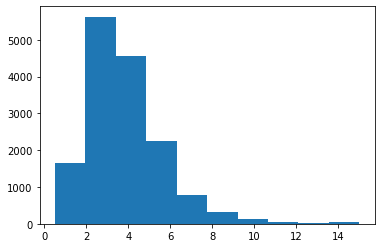

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(X_train[:, 0]);

There are times when it can be useful to convert distributions like this into a more normal distribution.  `scikit-learn` offers transformers to do this, but they by default operate over all columns which are passed to them.  We can thus use the `ColumnTransformer` to only transformer a single column.  The object is created with a tuple of `(name, transformer, column_selector)` where the `column_selector` is either a list of column indices or a list of column names (if using a `DataFrame`) which will be passed to the transformer.

We can either choose to only take the single column:

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

ct = ColumnTransformer([
    ('power', PowerTransformer(), [0])
], remainder='drop')
ct.fit_transform(X_train)

array([[-1.39860838],
       [-0.23091269],
       [-0.67081371],
       ...,
       [ 0.50237097],
       [-0.52384217],
       [-0.07158379]])

Or we can choose to keep the remainder of the columns by toggling the `remainder` keyword argument.

In [33]:
ct = ColumnTransformer([
    ('power', PowerTransformer(), [0])
], remainder='passthrough')
ct.fit_transform(X_train)

array([[-1.39860838e+00,  1.70000000e+01,  4.94010417e+00, ...,
         3.14322917e+00,  3.68200000e+01, -1.19690000e+02],
       [-2.30912689e-01,  4.90000000e+01,  5.83000000e+00, ...,
         2.35000000e+00,  3.67700000e+01, -1.19810000e+02],
       [-6.70813714e-01,  4.00000000e+01,  6.51204819e+00, ...,
         3.04216867e+00,  3.45200000e+01, -1.20390000e+02],
       ...,
       [ 5.02370970e-01,  3.60000000e+01,  5.22968198e+00, ...,
         2.81272085e+00,  3.76900000e+01, -1.22160000e+02],
       [-5.23842174e-01,  1.30000000e+01,  5.27520436e+00, ...,
         3.15531335e+00,  3.73200000e+01, -1.20500000e+02],
       [-7.15837947e-02,  3.20000000e+01,  4.33873057e+00, ...,
         1.76489637e+00,  3.39700000e+01, -1.18370000e+02]])

Now we get a nice looking distribution

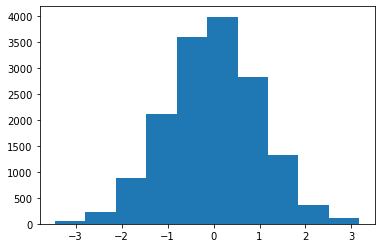

In [34]:
plt.hist(ct.transform(X_train)[:, 0]);

### Feature Union

Often we need to apply different sets of transformations to different parts of the datasets (or even different datasets) in order to arrive at the final engineered feature matrix.  A `Pipeline` gives the developer the ability to do logical sequential operations, the `FeatureUnion` allows the developer to perform operations individual groups of data elements and then merge them together.

For example, lets say that we want to scale our dataset, but also generate interaction features.  We can do this by invoking a `FeatureUnion`.

In [35]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
ftu = FeatureUnion([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, interaction_only=True))
])
ftu.fit_transform(X_train)

array([[-1.09509018e+00, -9.20716983e-01, -2.20580935e-01, ...,
         1.15733698e+02, -3.76213099e+02, -4.40698580e+03],
       [-3.79824411e-01,  1.62288904e+00,  1.90071462e-01, ...,
         8.64095000e+01, -2.81553500e+02, -4.40541370e+03],
       [-6.89353697e-01,  9.07499844e-01,  5.04810238e-01, ...,
         1.05015663e+02, -3.66246687e+02, -4.15586280e+03],
       ...,
       [ 2.81951643e-01,  5.89549091e-01, -8.69520110e-02, ...,
         1.06011449e+02, -3.43601979e+02, -4.60421040e+03],
       [-5.92085194e-01, -1.23866774e+00, -6.59451986e-02, ...,
         1.17756294e+02, -3.80215259e+02, -4.49706000e+03],
       [-2.53051659e-01,  2.71598339e-01, -4.98091515e-01, ...,
         5.99535298e+01, -2.08910784e+02, -4.02102890e+03]])

In [36]:
StandardScaler().fit_transform(X_train).shape, PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X_train).shape

((15480, 8), (15480, 37))

Notice here that the number of features has grown.

In [37]:
ftu.fit_transform(X_train).shape

(15480, 45)

`FeatureUnion`s are often best used when combined with `Pipeline`s to allow almost generic complexity of feature transformation and engineering.

In [38]:
ftu_pipe = Pipeline([
    ('features', ftu),
    ('regression', LinearRegression())
])

ftu_pipe.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('scale', StandardScaler()),
                                                ('polynomial',
                                                 PolynomialFeatures(interaction_only=True))])),
                ('regression', LinearRegression())])

In [39]:
ftu_pipe.predict(X_test)

array([1.51147126, 0.72981909, 1.06374069, ..., 2.1236008 , 4.47891679,
       2.70882925])

It would be quite ordinary to see many layers of `Pipeline` and `FeatureUnion` together.  The key thing is that all of these objects are just themselves `Estimators` and thus can be composed over and over to achieve the desired transformation logic.

## Custom Estimators and Transformer

Although `scikit-learn` offers a wealth of built-in functionality, there are  cases where you want to extend this functionality.  

`scikit-learn` operates under a duck typing principle where objects just need to expose the expected interfaces, and the variety of base classes, mixins, and utility functions can be reused to reduce the amount of boilerplate needed code.

For example, here is a `Transformer` which implements mean subtraction, and inherits and overrides the functionality from `BaseEstimator` and `TransformerMixin`.

In [13]:
from sklearn import base

class SubtractMeanTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        self.mean_ = X.mean(axis=0)
        return self
    
    def transform(self, X):
        return X - self.mean_

In [20]:
import numpy as np
X = np.array([
    [1, 2, 3],
    [2, 3, 4]
])
mt = SubtractMeanTransformer()
print(f"mt.fit_transform(X): \n {mt.fit_transform(X)}")
print(f"mt.mean_: \n {mt.mean_}")

mt.fit_transform(X): 
 [[-0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5]]
mt.mean_: 
 [1.5 2.5 3.5]


`scikit-learn` offers a utility for comprehensively testing this new class with respect to edge cases.  

In [21]:
from sklearn.utils.estimator_checks import check_estimator
try:
    check_estimator(SubtractMeanTransformer())
except AssertionError as e:
    print(e)

Did not raise: [<class 'ValueError'>]


In order to comply with all interfaces and expectations, we need to add a few utility functions to get a fully compliant transformer.

In [22]:
from sklearn.utils.validation import check_X_y, check_array
class SubtractMeanTransformerProper(base.BaseEstimator, base.TransformerMixin):
    def fit(self, X, y=None):
        X, y = check_X_y(X, y)
        self.n_features_in_ = X.shape[1]
        self.mean_ = X.mean(axis=0)
        return self
    
    def transform(self, X):
        X = check_array(X)
        return X - self.mean_

check_estimator(SubtractMeanTransformerProper())

# Summary

Scikit-learn is a open-source, well-documented pythonframework with all the functionality for developing ML applications and ML Modeling pipelines.   

You are  encouraged you to read the documentation at
<a href="https://scikit-learn.org/stable/index.html">Scikit-learn API</a>


You are also encouraged to expand your knowledge of ML by exploring the source code at:
<a href="https://github.com/scikit-learn/scikit-learn">Scikit-learn Source code</a>


While there are other frameworks (e.g. Pytorch and Tensorflow) for specific modeling approaches like deep learning, or which support industrial-strength productions applications, however, mastery of Scikit-learn is very useful for quick prototyping, as well as for easily progressing to using these more specialized frameworks.

